# Detecting Brain Tumors

## Imports

In [155]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
import shutil

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf

### Load Dataset

In [156]:
dff = pd.read_csv('data/Brain_Tumor.csv')

In [157]:
dff.head()

Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e-155  
2       5.981800     0.978014  7.458341e-155  
3       7.700919     0.964189  7.458341e-155  
4       6.834689     0.972789  7.458341e-155

In [158]:
dff.describe()

Class         Mean     Variance  Standard Deviation      Entropy  \
count  3762.000000  3762.000000  3762.000000         3762.000000  3762.000000   
mean      0.447368     9.488890   711.101063           25.182271     0.073603   
std       0.497288     5.728022   467.466896            8.773526     0.070269   
min       0.000000     0.078659     3.145628            1.773592     0.000882   
25%       0.000000     4.982395   363.225459           19.058475     0.006856   
50%       0.000000     8.477531   622.580417           24.951560     0.066628   
75%       1.000000    13.212723   966.954319           31.095889     0.113284   
max       1.000000    33.239975  2910.581879           53.949809     0.394539   

          Skewness     Kurtosis     Contrast       Energy          ASM  \
count  3762.000000  3762.000000  3762.000000  3762.000000  3762.000000   
mean      4.102727    24.389071   127.961459     0.204705     0.058632   
std       2.560940    56.434747   109.499601     0.129352     0.058300   
min       1.886014     3.942402     3.194733     0.024731     0.000612   
25%       2.620203     7.252852    72.125208     0.069617     0.004847   
50%       3.422210    12.359088   106.737418     0.225496     0.050849   
75%       4.651737    22.640304   161.059006     0.298901     0.089342   
max      36.931294  1371.640060  3382.574163     0.589682     0.347725   

       Homogeneity  Dissimilarity  Correlation     Coarseness  
count  3762.000000    3762.000000  3762.000000   3.762000e+03  
mean      0.479252       4.698498     0.955767  7.458341e-155  
std       0.127929       1.850173     0.026157   0.000000e+00  
min       0.105490       0.681121     0.549426  7.458341e-155  
25%       0.364973       3.412363     0.947138  7.458341e-155  
50%       0.512551       4.482404     0.961610  7.458341e-155  
75%       0.575557       5.723821     0.971355  7.458341e-155  
max       0.810921      27.827751     0.989972  7.458341e-155

In [159]:
# drop Image feature
df = dff.drop(columns=['Image'])

In [160]:
df.columns

Index(['Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')

### Data Exploration

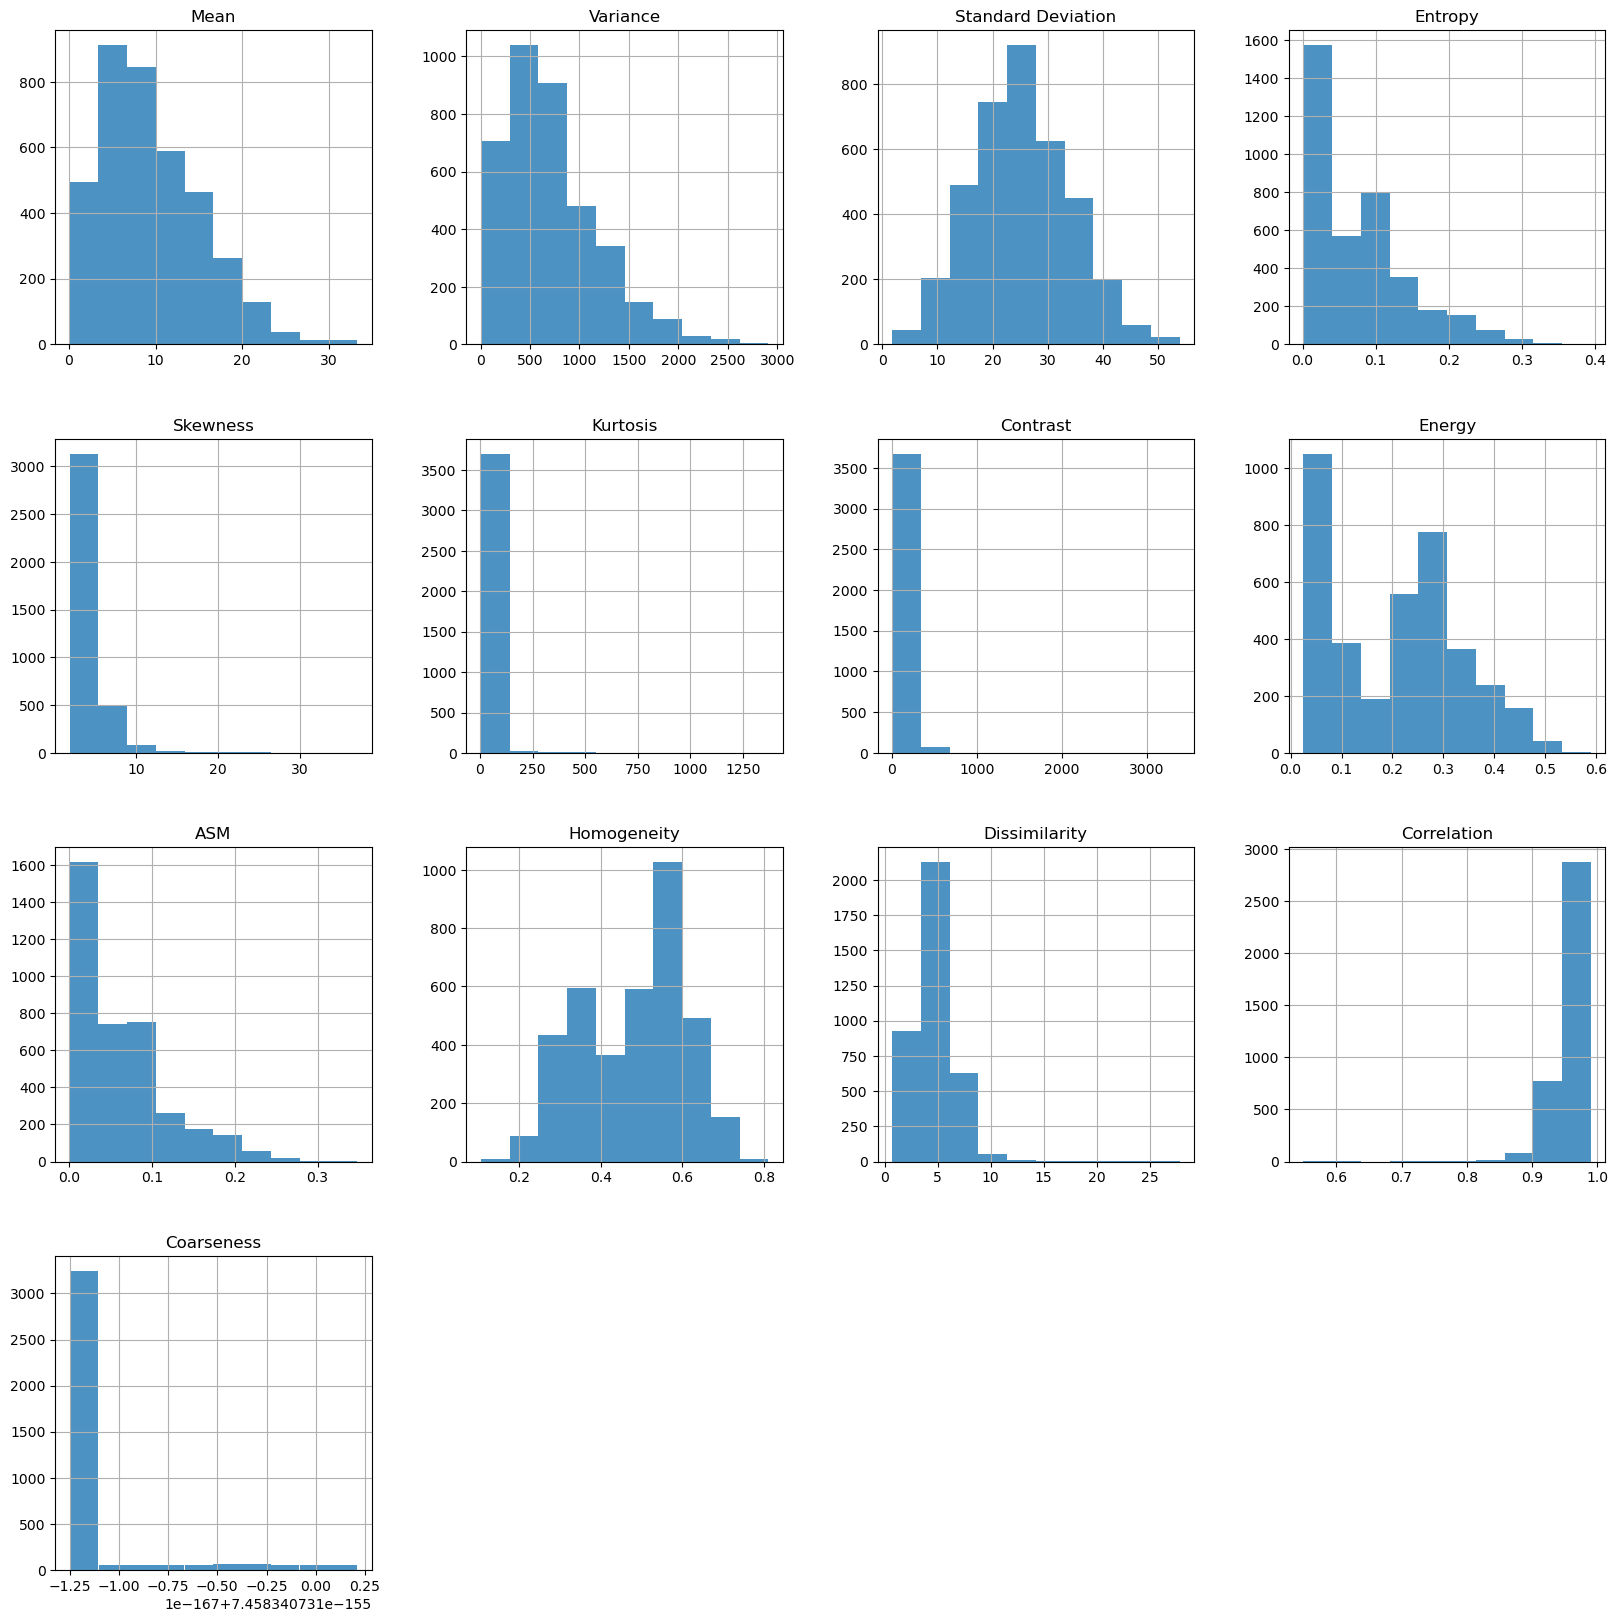

In [161]:
df[df.columns[1:14]].hist(alpha=0.8, figsize=(20, 20))
plt.savefig('plots/distributions.pdf')

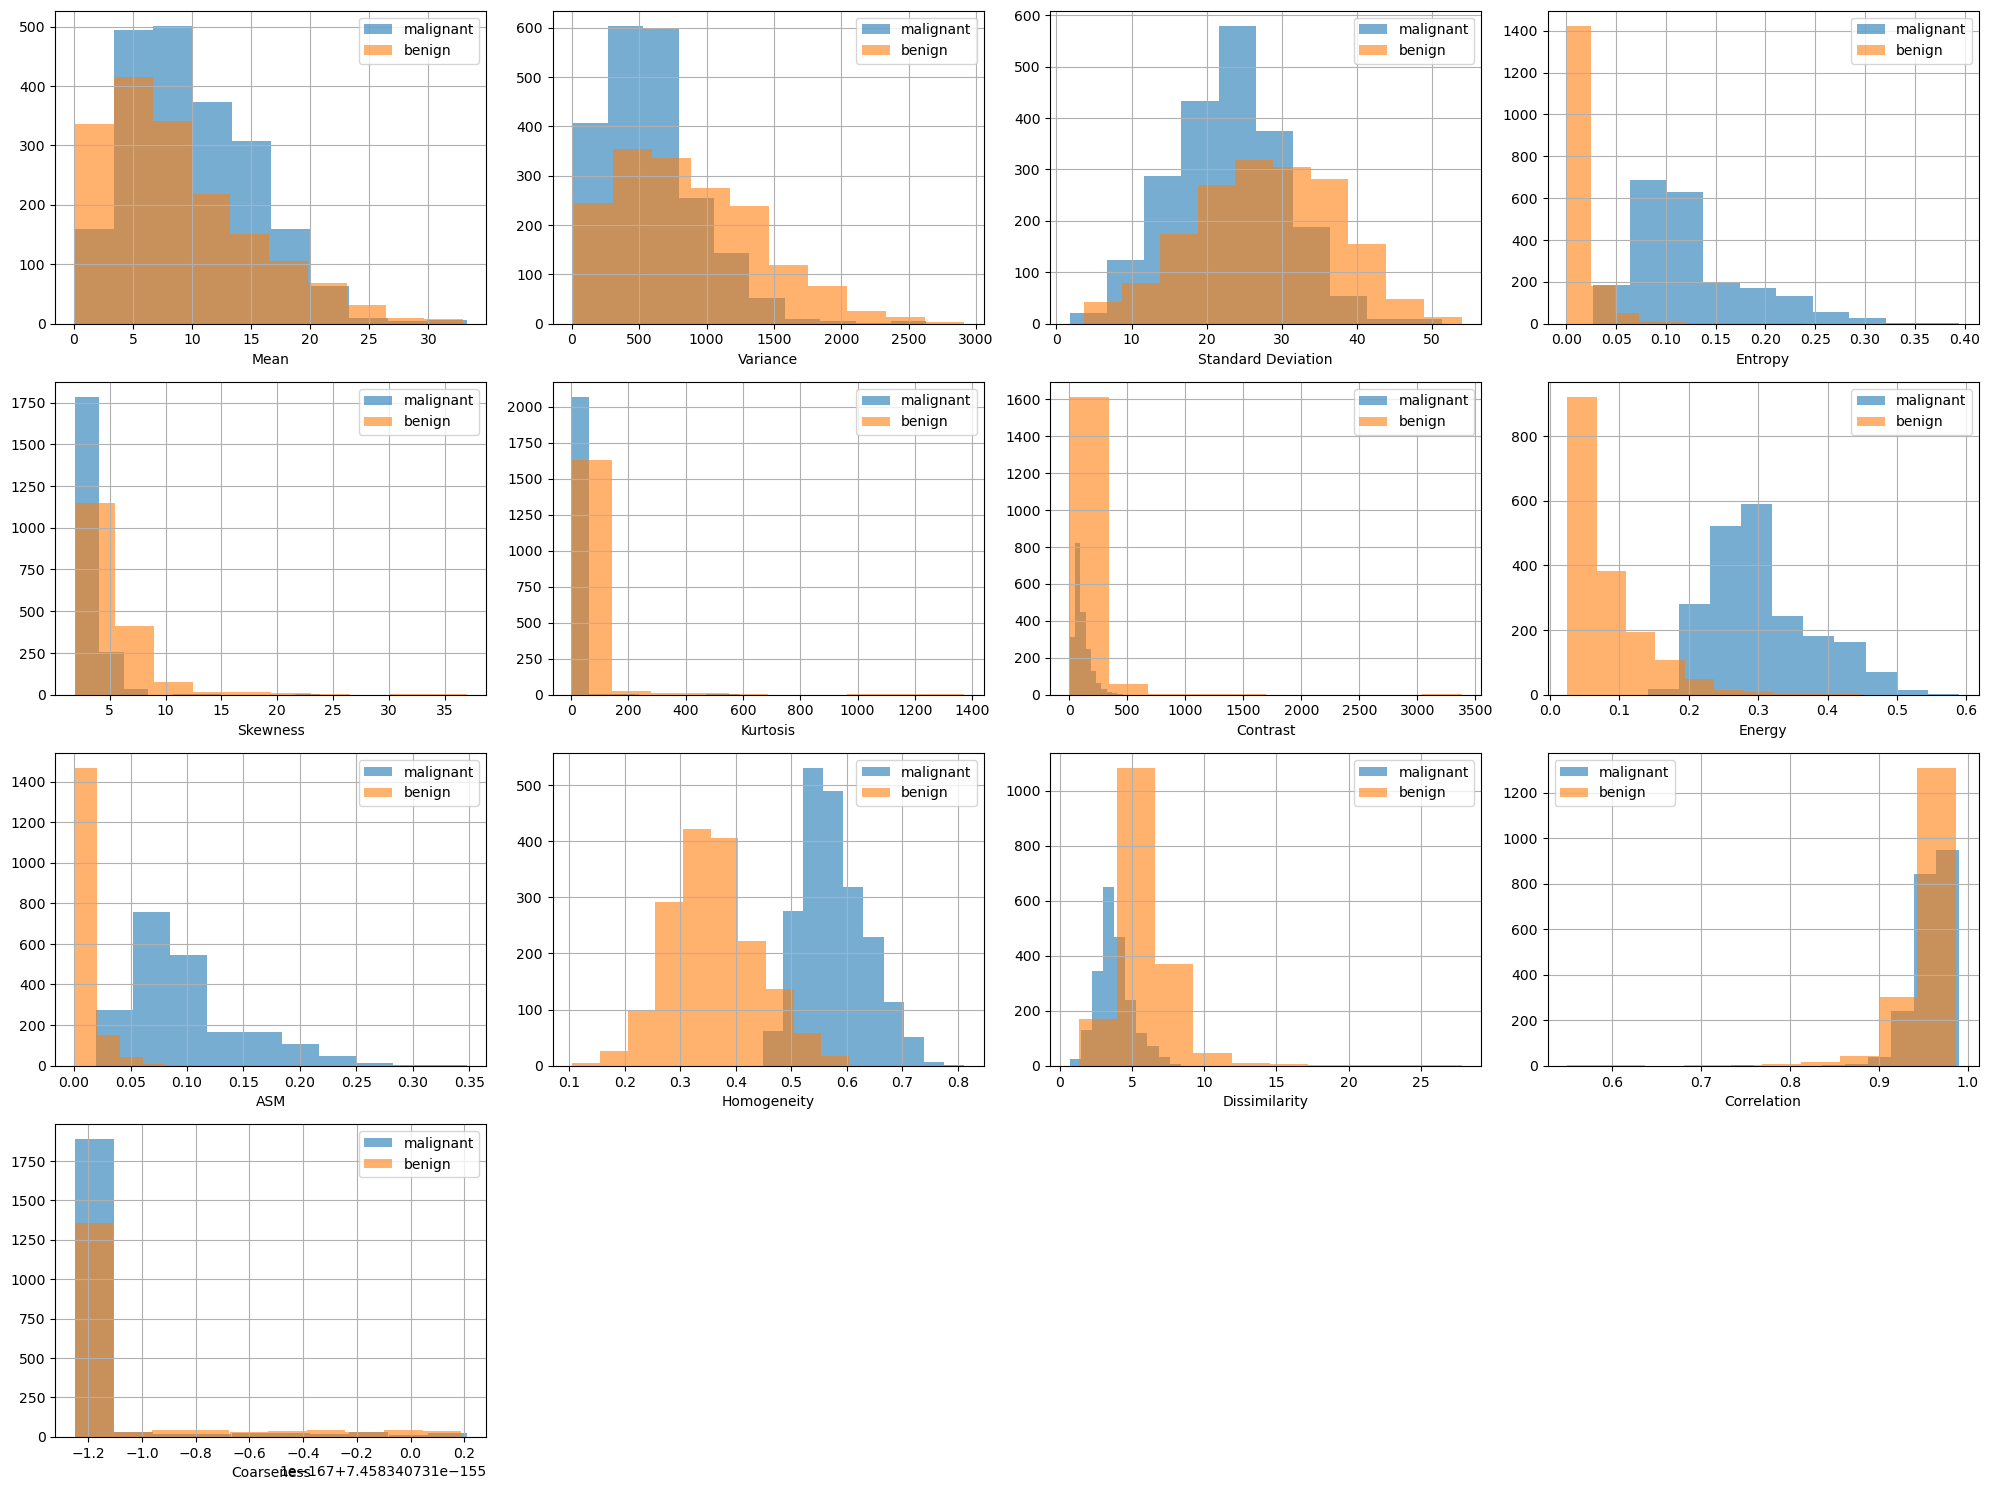

In [162]:
size=(20, 15)

for i in range(1, 14):
    plt.subplot(4, 4, i)
    df.groupby('Class')[df.columns[i]].hist(alpha=0.6, figsize=size)
    plt.legend(['malignant', 'benign'])
    plt.xlabel(df.columns[i])
    plt.tight_layout()
    plt.savefig('plots/benign_malignant_comparison.pdf')

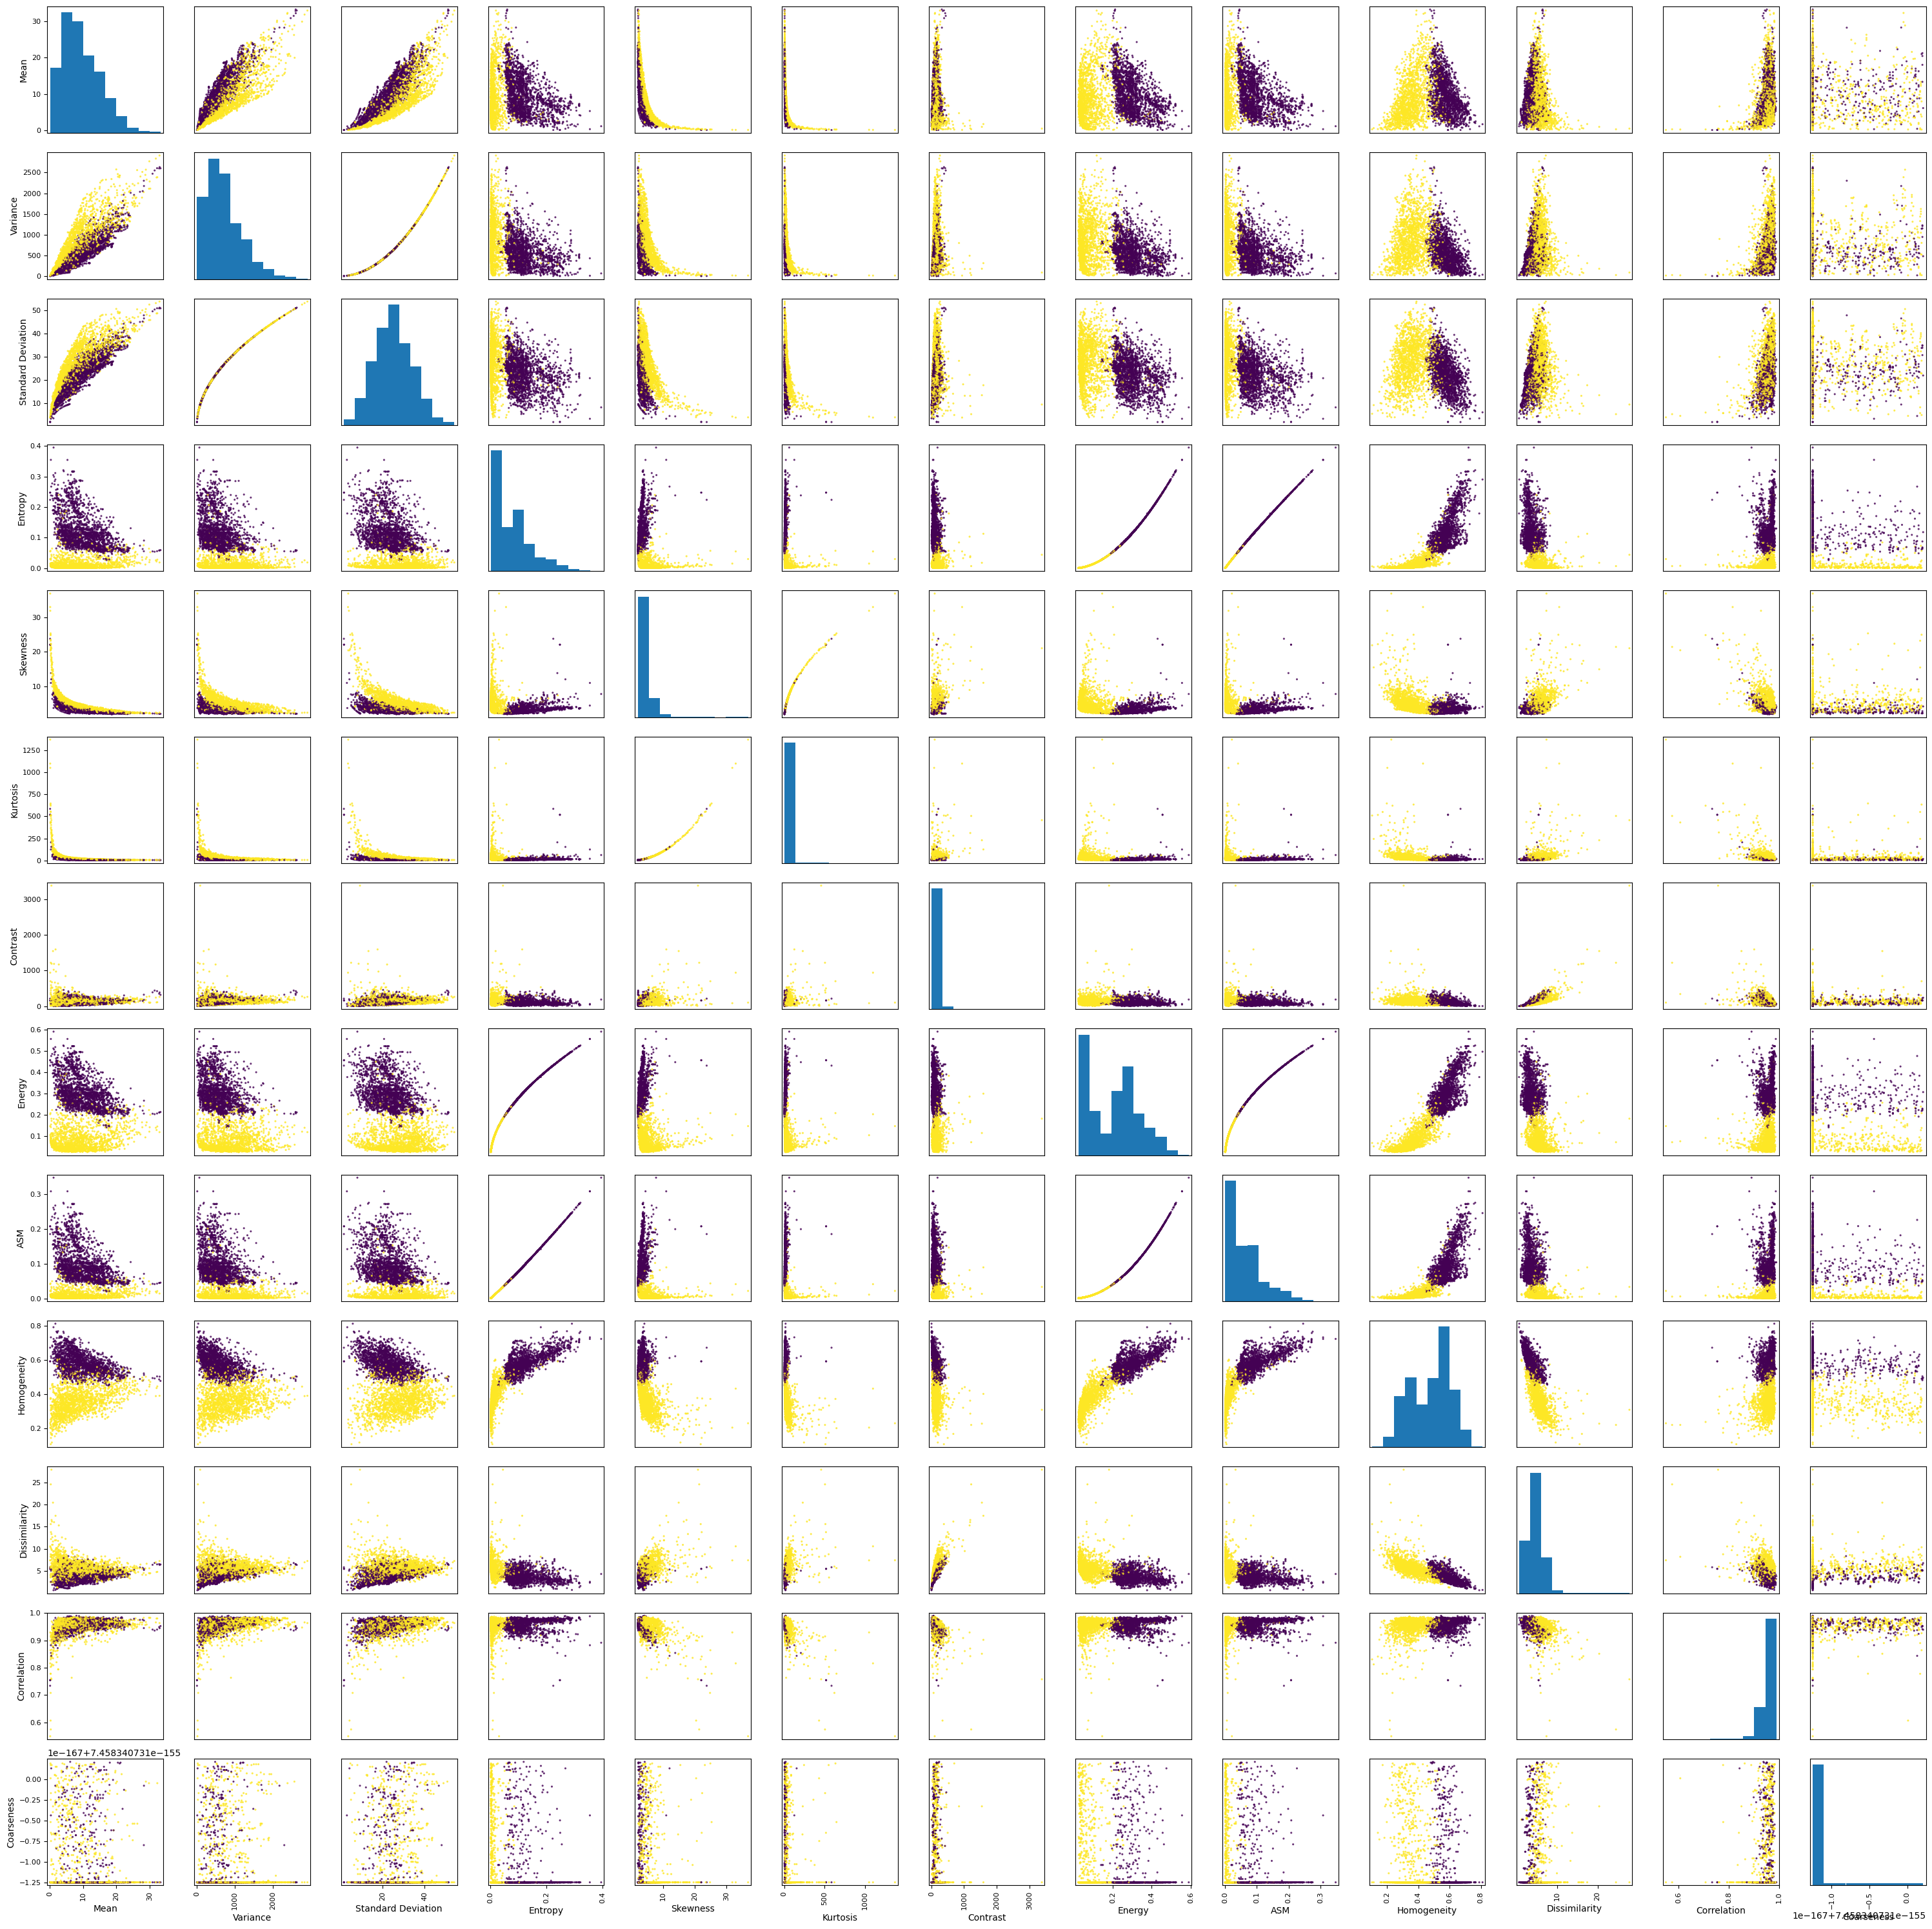

<Figure size 640x480 with 0 Axes>

In [163]:
scatter_matrix(df[df.columns[1:14]], c=df['Class'], alpha=0.8, figsize=(30, 30), s=20)
plt.tight_layout()
plt.show()
plt.savefig('plots/scatter_matrix.pdf')

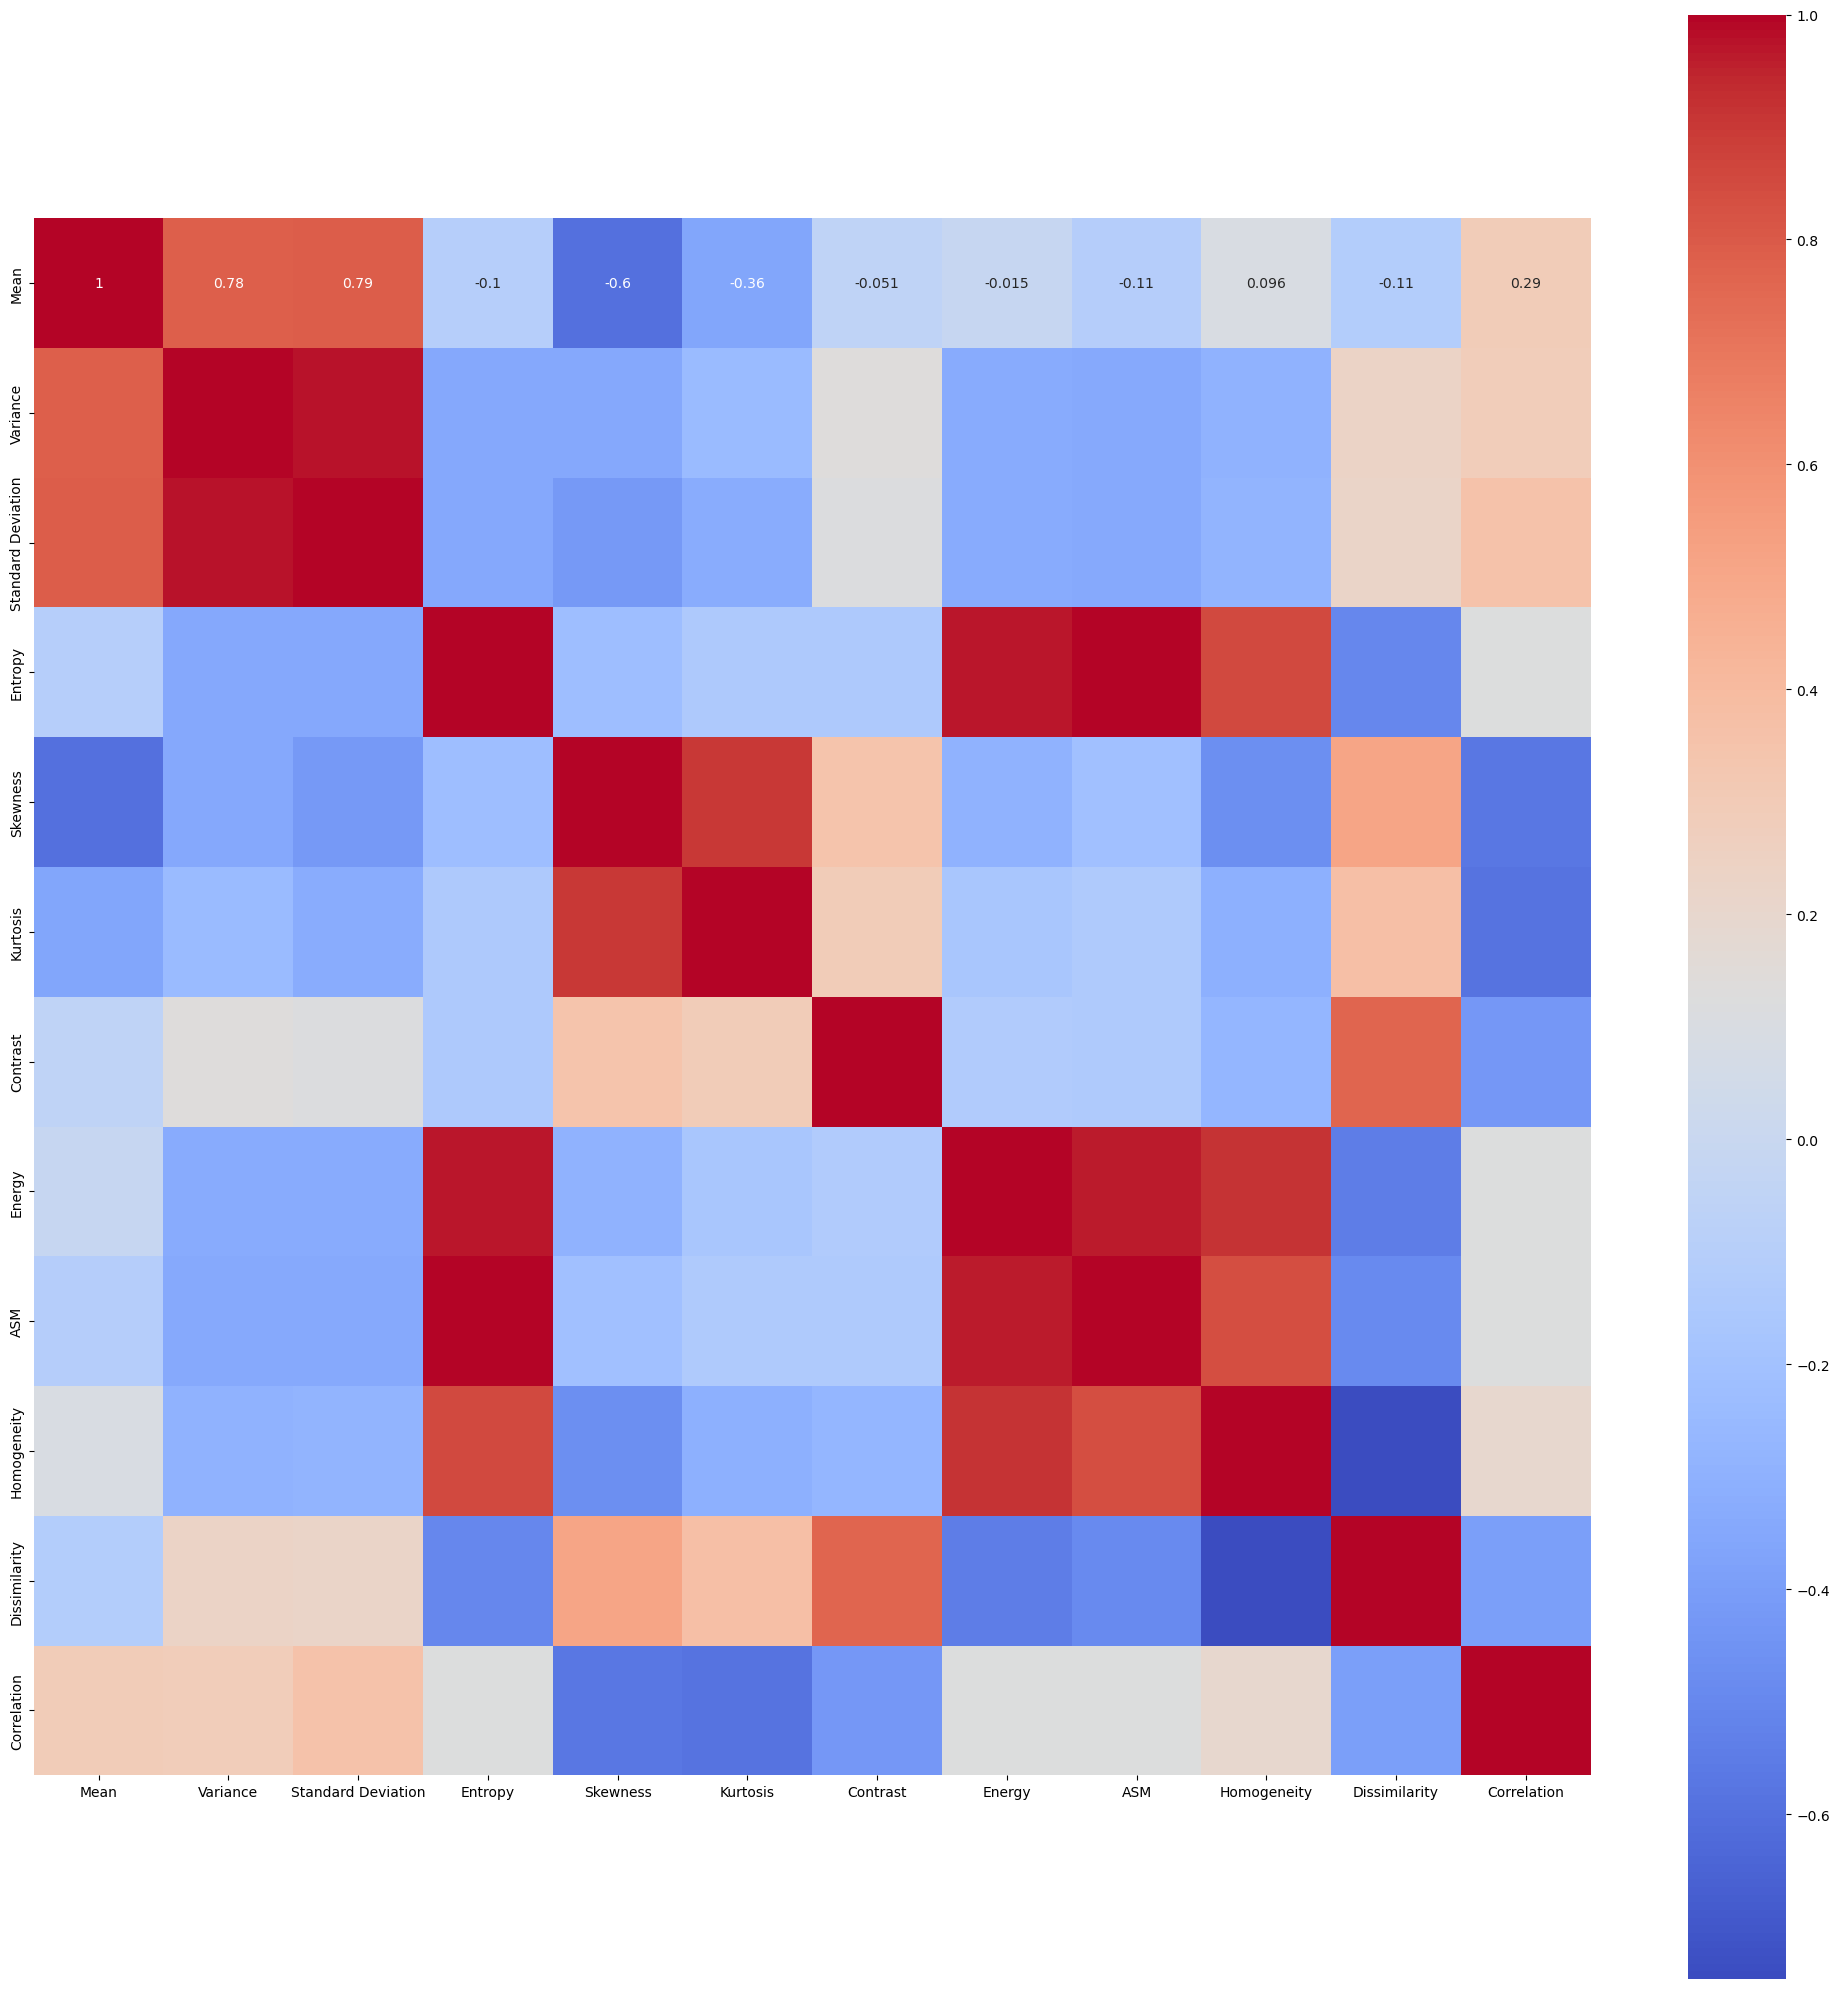

<Figure size 640x480 with 0 Axes>

In [164]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.columns[1:13]].corr(), annot=True, square=True, cmap='coolwarm')
plt.tight_layout()
plt.show()
plt.savefig('plots/correlation.pdf')

## Preprocessing

In [165]:
# test-train split
X, y = np.array(df.iloc[:, 1:14]), df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [166]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models

### SVM

In [167]:
SVM = SVC()
SVM.fit(X_train, y_train)
svm_pred = SVM.predict(X_test)

In [168]:
print('Accuracy: %.4f' % accuracy_score(y_test, svm_pred))

Accuracy: 0.9801


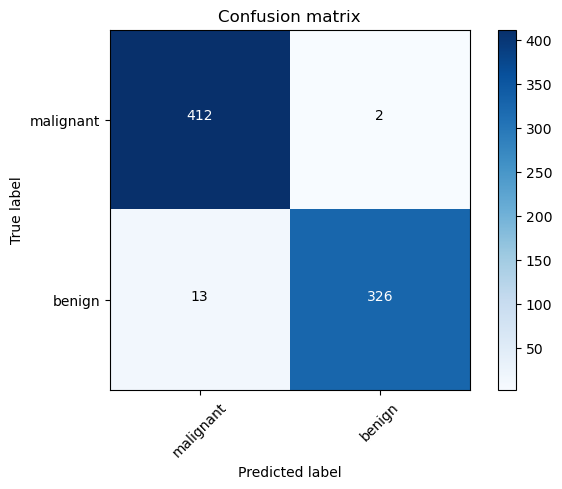

In [169]:
from sklearn.metrics import confusion_matrix

conf_mtx = confusion_matrix(y_test, svm_pred)
plot_confusion_matrix(cm=confusion_matrix(y_test, svm_pred), classes=['malignant', 'benign'])
plt.savefig('plots/confusion_matrix_SVM.pdf')

### Logistic Regression

In [170]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [171]:
print('Accuracy: %.4f' % accuracy_score(y_test, lr_pred))

Accuracy: 0.9788


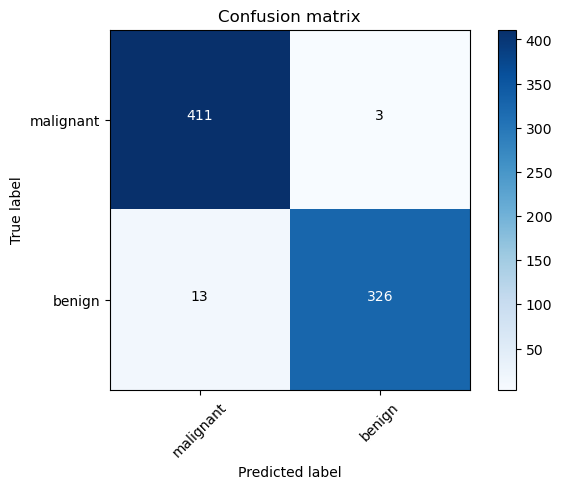

In [172]:
confusion_matrix(y_test, lr_pred)
plot_confusion_matrix(cm=confusion_matrix(y_test, lr_pred), classes=['malignant', 'benign'])
plt.savefig('plots/confusion_matrix_LR.pdf')

### kNN

In [173]:
# kNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [174]:
print('Accuracy: %.4f' % accuracy_score(y_test, knn_pred))

Accuracy: 0.9761


## CNN
### Load Images

In [175]:
# move files from Brain_Tumor directory to Malignant and Benign directories
#for i in range(0, 3762):
#    if df['Class'][i]==0:
#        shutil.move(f'data/Brain_Tumor/Brain_Tumor/Image{i+1}.jpg', f'data/Brain_Tumor/Benign/Image{i+1}.jpg')
#    else:
#        shutil.move(f'data/Brain_Tumor/Brain_Tumor/Image{i+1}.jpg', f'data/Brain_Tumor/Malignant/Image{i+1}.jpg')

In [176]:
img_height = 240
img_width = 240
batch_size = 32
data_dir = 'data/Brain_Tumor'

# get train dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3010 files belonging to 2 classes.
Using 2408 files for training.


In [177]:
# get validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3010 files belonging to 2 classes.
Using 602 files for validation.


In [178]:
# get test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    'data/test_data',
    shuffle=False,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 752 files belonging to 2 classes.


In [179]:
class_names = train_ds.class_names
print(class_names)

['Benign', 'Malignant']


2024-07-13 20:53:52.953676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2408]
	 [[{{node Placeholder/_4}}]]
2024-07-13 20:53:52.954123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2408]
	 [[{{node Placeholder/_0}}]]


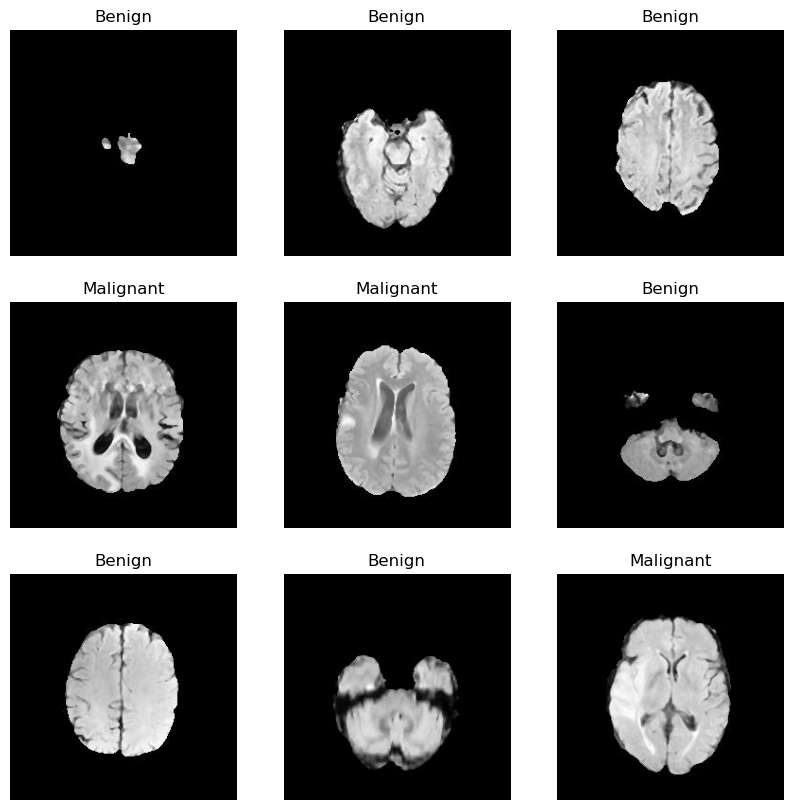

In [180]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.savefig('plots/tumor_images.pdf')

In [181]:
CNN = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

CNN.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [182]:
CNN_hist = CNN.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

Epoch 1/3


2024-07-13 20:54:01.910580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2408]
	 [[{{node Placeholder/_4}}]]
2024-07-13 20:54:01.910832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2408]
	 [[{{node Placeholder/_0}}]]


76/76 [==============================] - ETA: 0s - loss: 0.5102 - accuracy: 0.7571

2024-07-13 20:54:26.129863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [602]
	 [[{{node Placeholder/_4}}]]
2024-07-13 20:54:26.130049: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [602]
	 [[{{node Placeholder/_4}}]]


76/76 [==============================] - 26s 340ms/step - loss: 0.5102 - accuracy: 0.7571 - val_loss: 0.4235 - val_accuracy: 0.8339
Epoch 2/3
76/76 [==============================] - 24s 318ms/step - loss: 0.3669 - accuracy: 0.8472 - val_loss: 0.3485 - val_accuracy: 0.8522
Epoch 3/3
76/76 [==============================] - 25s 323ms/step - loss: 0.2706 - accuracy: 0.8862 - val_loss: 0.2655 - val_accuracy: 0.9003


In [183]:
cnn_pred = CNN.predict(test_ds)

 1/24 [>.............................] - ETA: 4s

2024-07-13 20:55:17.063664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [752]
	 [[{{node Placeholder/_4}}]]
2024-07-13 20:55:17.063802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [752]
	 [[{{node Placeholder/_4}}]]


24/24 [==============================] - 2s 95ms/step


In [184]:
cnn_pred = cnn_pred.argmax(axis=1)

In [185]:
# get test labels
test_labels = np.zeros(752)
test_labels[0:336] = 0
test_labels[336:] = 1

In [186]:
print('Accuracy: %.4f' % accuracy_score(test_labels, cnn_pred))

Accuracy: 0.9003


# Evaluation

In [187]:
import itertools
from sklearn.metrics import r2_score, classification_report, mean_squared_error, mean_absolute_error



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def evaluate_model(test, predict, model):
    conf_mtx = confusion_matrix(test, predict)
    plot_confusion_matrix(cm=conf_mtx, classes=['malignant', 'benign'], title=f'Confusion matrix for {model}')
    plt.savefig(f'plots/confusion_matrix_{model}.pdf')
    plt.show()

    predict.reshape(-1)

    plt.hist(test, alpha=0.5, color='red', range=[0, 1], bins=2)
    plt.hist(predict, alpha=0.5, color='red', range=[0, 1], bins=2, histtype='step', linewidth=2)
    plt.tight_layout()
    plt.xlabel('Class')
    plt.ylabel('Number')
    plt.xticks([0, 1], ['malignant', 'benign'])
    plt.title(f'Prediction distribution for {model}')
    plt.legend(['testing prediction', 'testing true'], loc='upper right')
    plt.savefig(f'plots/histogram_{model}.pdf')
    plt.show()


def false_predictions(test, predict, model):
    errors = np.where(test != predict)[0][:6]
    fig, axs = plt.subplots(2, 3, figsize=(12, 8))
    axs = axs.ravel()

    for i, err in enumerate(errors):
        axs[i].imshow(images[i].numpy().astype("uint8"), cmap='gray')
        if predict[err] == 0:
            axs[i].set_title(f"Malignant")
        else:
            axs[i].set_title(f"Benign")
        # axs[i].set_title(f"Predicted: {predict[err]}")
        axs[i].axis('off')

    fig.tight_layout()
    plt.title('{model} False Predictions')
    plt.savefig(f'plots/false_predictions_{model}.pdf')
    plt.show()


def adv_classifications(test, predict):
    print(classification_report(y_test, svm_pred))
    print('Coefficient of determination: %.4f' % r2_score(test, predict))
    # The mean squared error
    print("Mean squared error: %.4f" % mean_squared_error(test, predict))
    # The mean squared error
    print("Mean absolute error: %.4f" % mean_absolute_error(test, predict))


def full_evaluation(test, predict, model):
    print('Accuracy: %.4f' % accuracy_score(test, predict))
    adv_classifications(test, predict)
    evaluate_model(test, predict, model)
    false_predictions(test, predict, model)

## SVM

Accuracy: 0.9801
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       414
           1       0.99      0.96      0.98       339

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

Coefficient of determination: 0.9195
Mean squared error: 0.0199
Mean absolute error: 0.0199


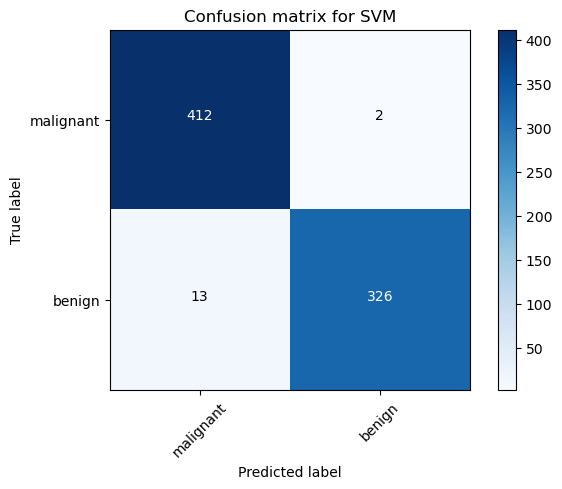

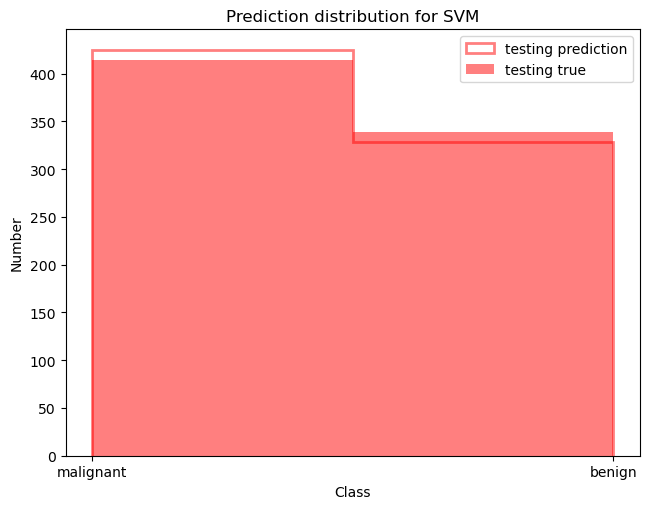

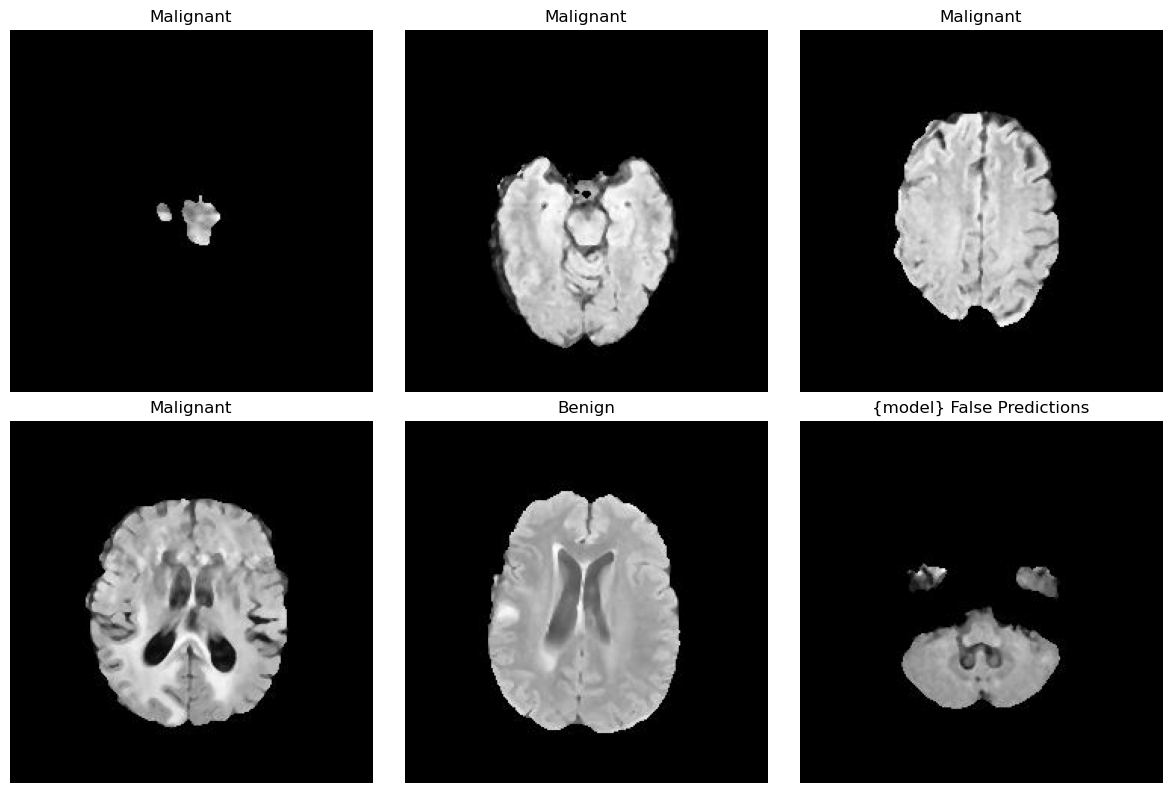

In [188]:
full_evaluation(y_test, svm_pred, 'SVM')

## Logistic Regression

Accuracy: 0.9788
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       414
           1       0.99      0.96      0.98       339

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

Coefficient of determination: 0.9142
Mean squared error: 0.0212
Mean absolute error: 0.0212


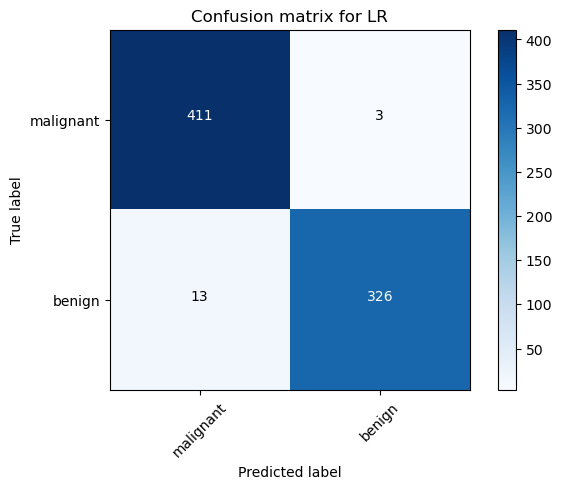

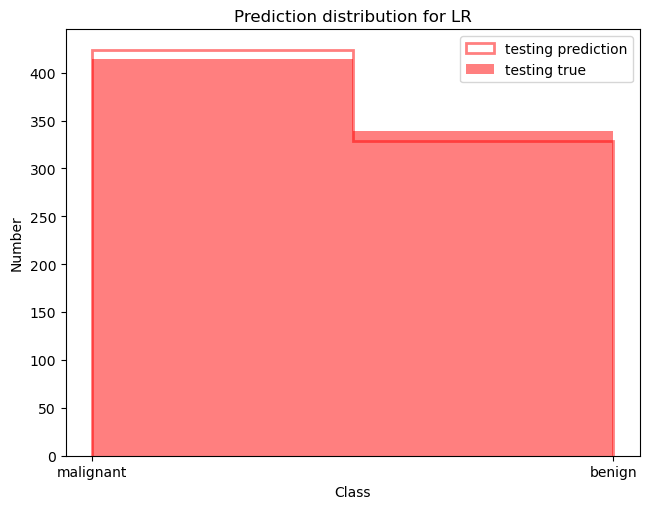

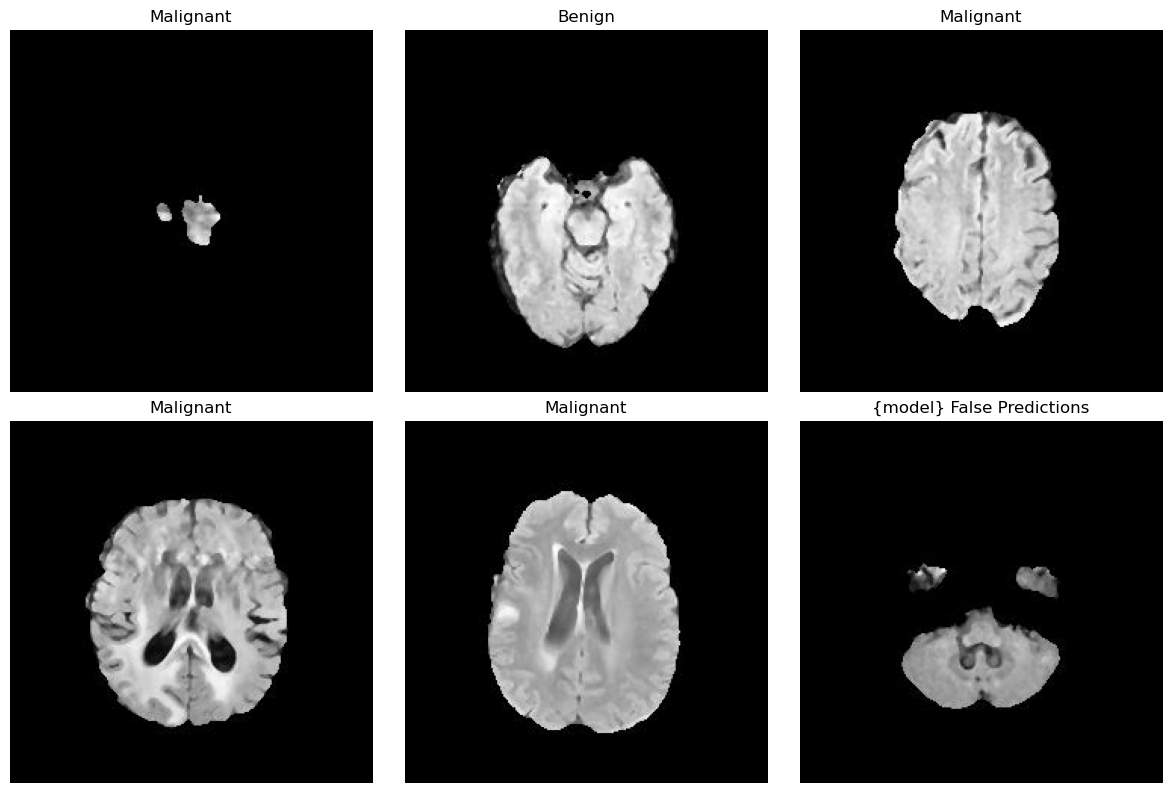

In [189]:
# evaluate_model(y_test, lr_pred, 'LR')
full_evaluation(y_test, lr_pred, 'LR')

## KNN

Accuracy: 0.9761
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       414
           1       0.99      0.96      0.98       339

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

Coefficient of determination: 0.9034
Mean squared error: 0.0239
Mean absolute error: 0.0239


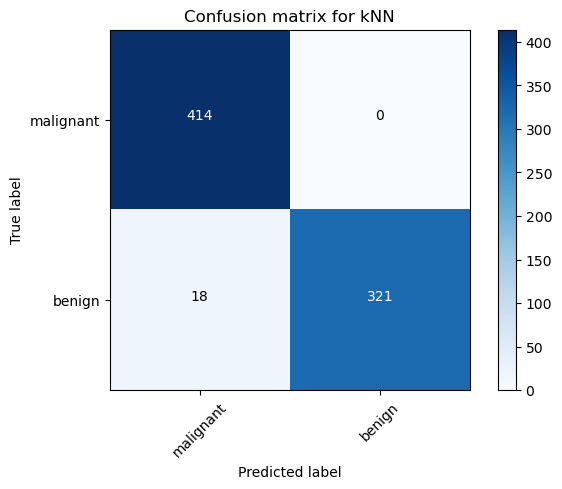

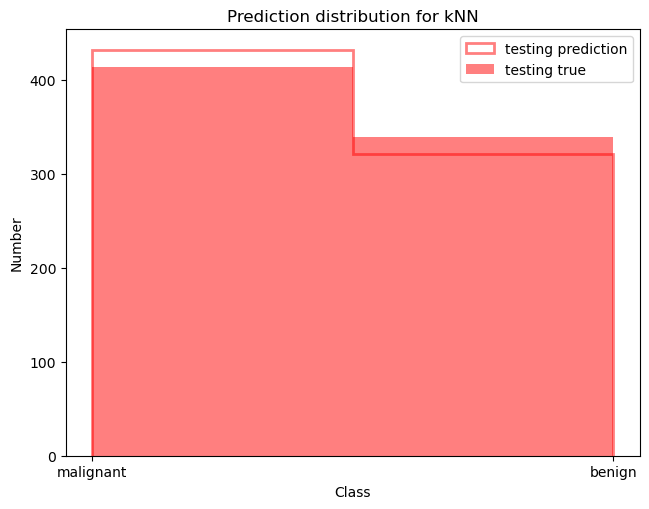

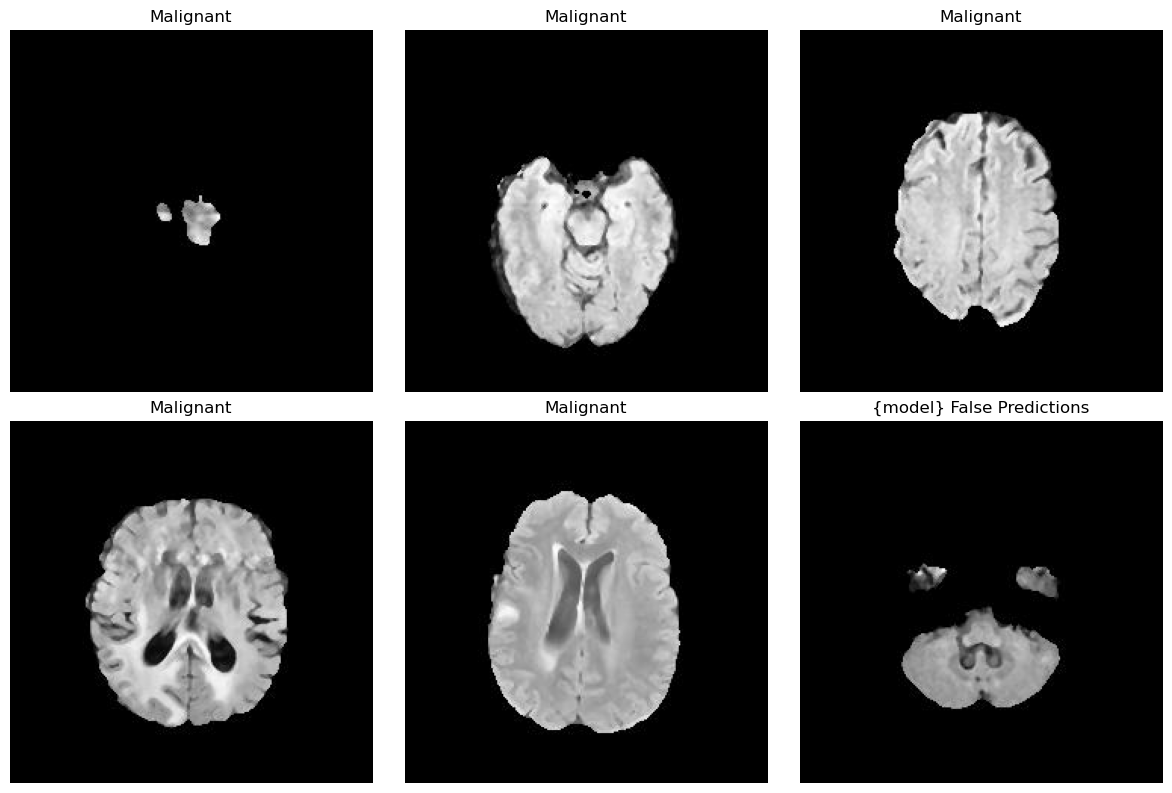

In [190]:
# evaluate_model(y_test, knn_pred, 'kNN')
full_evaluation(y_test, knn_pred, 'kNN')

## CNN

In [191]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

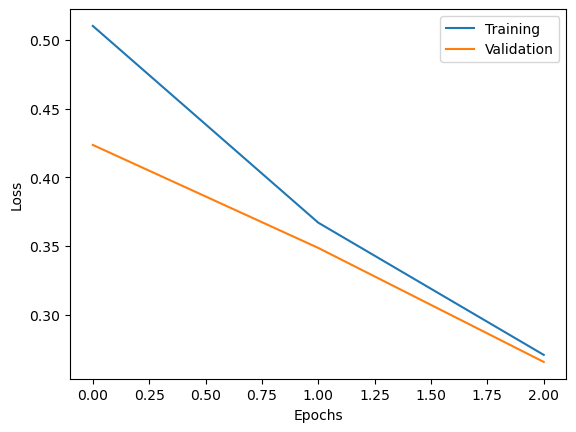

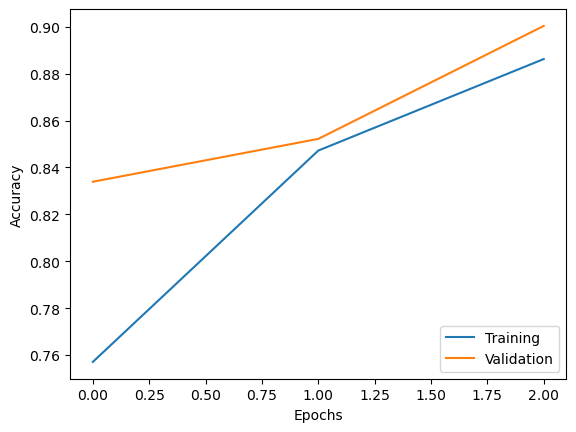

In [192]:
plot_history(CNN_hist)

Accuracy: 0.9003
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       414
           1       0.99      0.96      0.98       339

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

Coefficient of determination: 0.5965
Mean squared error: 0.0997
Mean absolute error: 0.0997


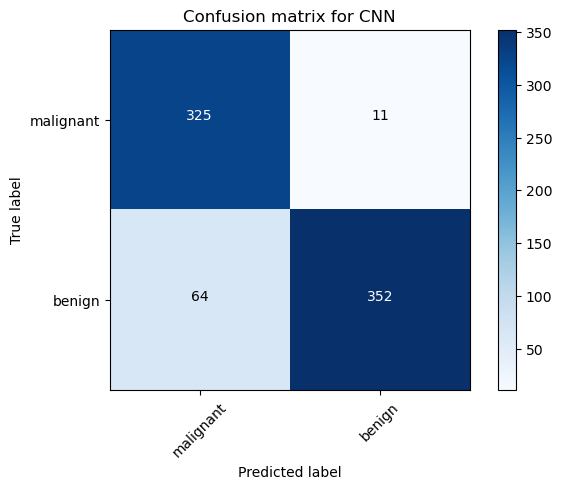

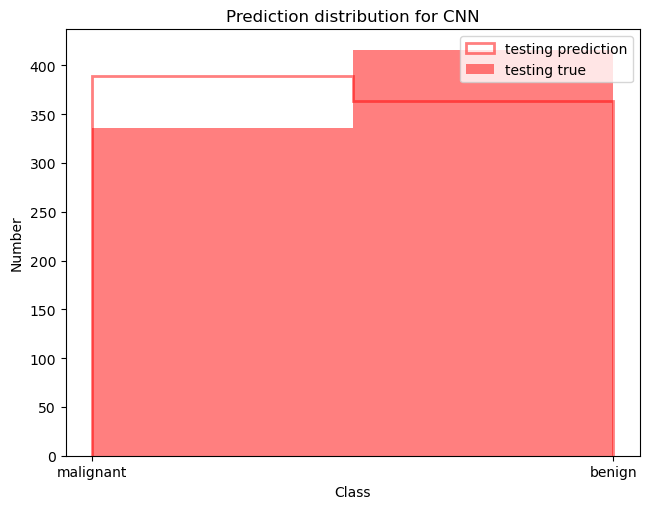

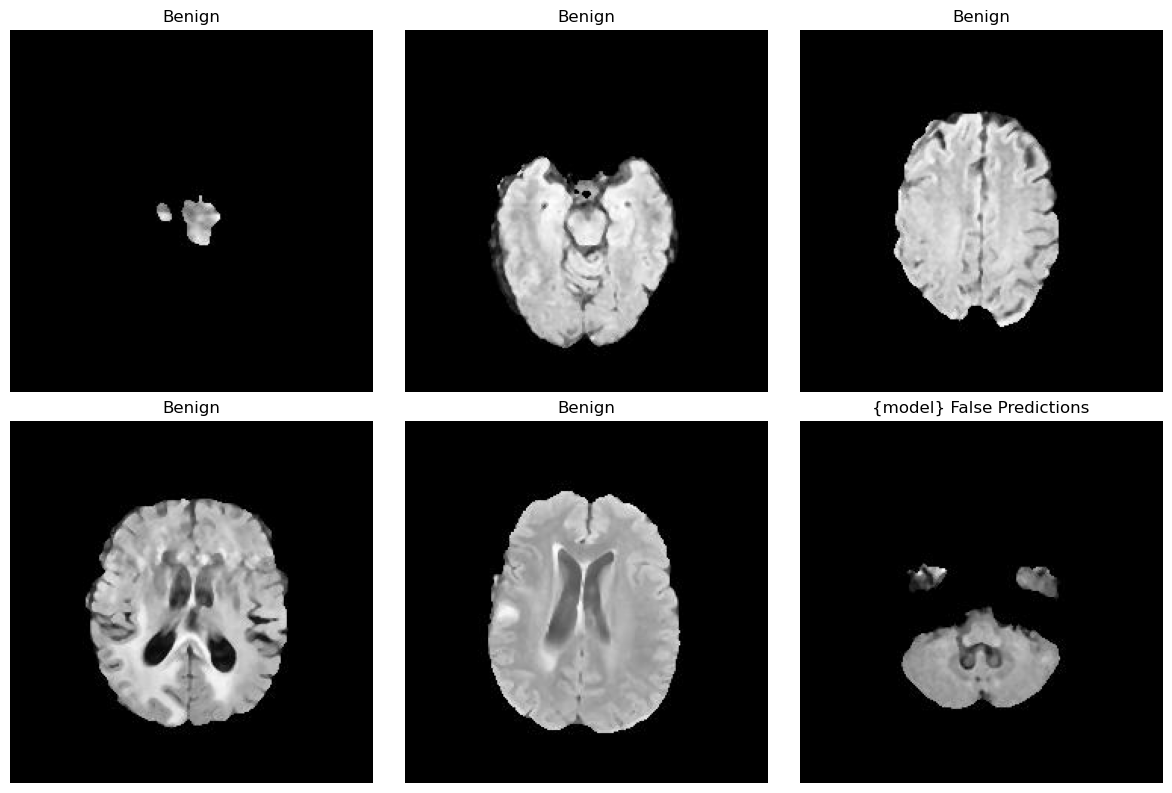

In [193]:
full_evaluation(test_labels, cnn_pred, 'CNN')